下面分别使用逻辑回归、svm、决策树、随机森林和XGBoost进行模型构建和模型评估

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# 导入数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x_train = pd.read_csv(r'C:\Users\付蓉\Desktop\datawhale笔记\x_train_rf.csv')
y_train =pd.read_csv(r'C:\Users\付蓉\Desktop\datawhale笔记\y_train.csv')


In [3]:
x_test = pd.read_csv(r'..\datawhale笔记\x_test.csv')
test = pd.read_csv(r'..\datawhale笔记\test.csv')
y_test = test['status']

# 模型建立
## 逻辑回归

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
log_reg = LogisticRegression()

In [6]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## SVM

In [7]:
from sklearn.svm import SVC

In [8]:
svm_clf = SVC()

In [9]:
svm_clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## 决策树

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 随机森林

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf_clf = RandomForestClassifier()

In [14]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## XGBoost

In [15]:
from xgboost import XGBClassifier

In [16]:
xgb_clf = XGBClassifier()

In [17]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

# 模型评估

以下从准确率、精确率、召回率、F1-score，AUC值、ROC曲线来评估模型

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [19]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_predict

In [20]:
# 准备数据
y_train_lg = log_reg.predict(x_train)
y_train_svm = svm_clf.predict(x_train)
y_train_tree = tree_clf.predict(x_train)
y_train_rf = rf_clf.predict(x_train)
y_train_xgb = xgb_clf.predict(x_train)
y_test_lg = log_reg.predict(x_test)
y_test_svm = svm_clf.predict(x_test)
y_test_tree = tree_clf.predict(x_test)
y_test_rf = rf_clf.predict(x_test)
y_test_xgb = xgb_clf.predict(x_test)
y_score_lg = cross_val_predict(log_reg,x_train,y_train,cv = 10,method = 'decision_function')
y_score_svm = cross_val_predict(svm_clf,x_train,y_train,cv = 10,method = 'decision_function')
y_score_tree = cross_val_predict(tree_clf,x_train,y_train,cv = 10,method='predict_proba')[:,1]
y_score_rf = cross_val_predict(rf_clf,x_train,y_train,cv = 10,method='predict_proba')[:,1]
y_score_xgb = cross_val_predict(xgb_clf,x_train,y_train,cv = 10,method='predict_proba')[:,1]

In [21]:
def model_profile(y_train,y_test,y_train_pred,y_test_pred,y_score,model_name):
    print('for model {}:\n'.format(str(model_name)))
    print('accuracy:\n')
    print('train:{}\n test:{}\n'.format(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)))
    print('precision:\n')
    print('train:{}\n test:{}\n'.format(precision_score(y_train,y_train_pred),precision_score(y_test,y_test_pred)))
    print('recall:\n')
    print('train:{}\n test:{}\n'.format(recall_score(y_train,y_train_pred),recall_score(y_test,y_test_pred)))
    print('f1-score:\n')
    print('train:{}\n test:{}\n'.format(f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)))
    print('AUC:\n')
    print('train:{}\n test:{}\n'.format(roc_auc_score(y_train,y_train_pred),roc_auc_score(y_test,y_test_pred)))
    # print('ROC curve:\n')
    fpr,tpr,thresholds = roc_curve(y_train,y_score)
    plot_roc_curve(fpr,tpr,model_name)

In [22]:
%matplotlib notebook
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2,label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel = ('False Positive Rate')
    plt.ylabel = ('True Positive Rate')
    plt.show()
    plt.legend()

for model logistic:

accuracy:

train:0.807108239095315
 test:0.7814619442351168

precision:

train:0.694954128440367
 test:0.6505376344086021

recall:

train:0.39504563233376794
 test:0.34971098265895956

f1-score:

train:0.5037406483790524
 test:0.4548872180451128

AUC:

train:0.668957524070664
 test:0.6417260315945154



<IPython.core.display.Javascript object>


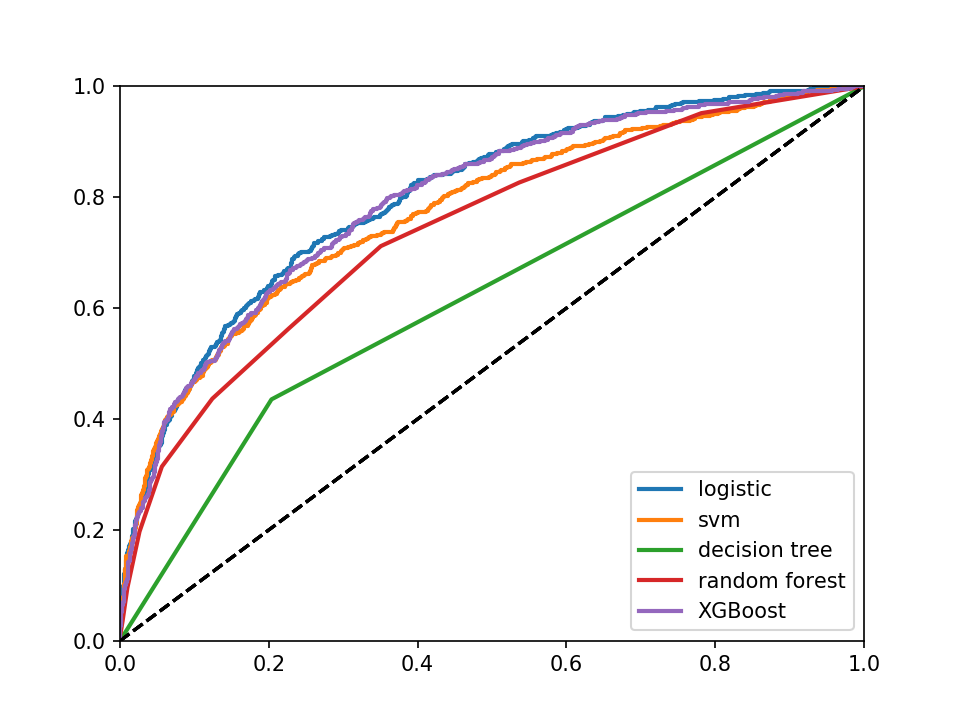

for model svm:

accuracy:

train:0.8397415185783522
 test:0.7792012057272042

precision:

train:0.8556430446194225
 test:0.6879432624113475

recall:

train:0.42503259452411996
 test:0.28034682080924855

f1-score:

train:0.5679442508710801
 test:0.39835728952772076

AUC:

train:0.7007035824854276
 test:0.617747314584033

for model decision tree:

accuracy:

train:1.0
 test:0.706103993971364

precision:

train:1.0
 test:0.43714285714285717

recall:

train:1.0
 test:0.4421965317919075

f1-score:

train:1.0
 test:0.4396551724137931

AUC:

train:1.0
 test:0.6206905186992157

for model random forest:

accuracy:

train:0.9854604200323102
 test:0.7671439336850038

precision:

train:0.9986187845303868
 test:0.6258503401360545

recall:

train:0.9426336375488917
 test:0.2658959537572254

f1-score:

train:0.9698189134808853
 test:0.37322515212981744

AUC:

train:0.9711020421421435
 test:0.6049153571028737

for model XGBoost:

accuracy:

train:0.8594507269789984
 test:0.7822155237377544

precision:

In [23]:
model_profile(y_train,y_test,y_train_lg,y_test_lg,y_score_lg,'logistic') # 逻辑回归
model_profile(y_train,y_test,y_train_svm,y_test_svm,y_score_svm,'svm') # svm
model_profile(y_train,y_test,y_train_tree,y_test_tree,y_score_tree,'decision tree') # 决策树
model_profile(y_train,y_test,y_train_rf,y_test_rf,y_score_rf,'random forest') # 随机森林
model_profile(y_train,y_test,y_train_xgb,y_test_xgb,y_score_xgb,'XGBoost') # XGBoost

图好像有点问题不知道怎么回事？？？